In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [163]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


TASK 1 a)

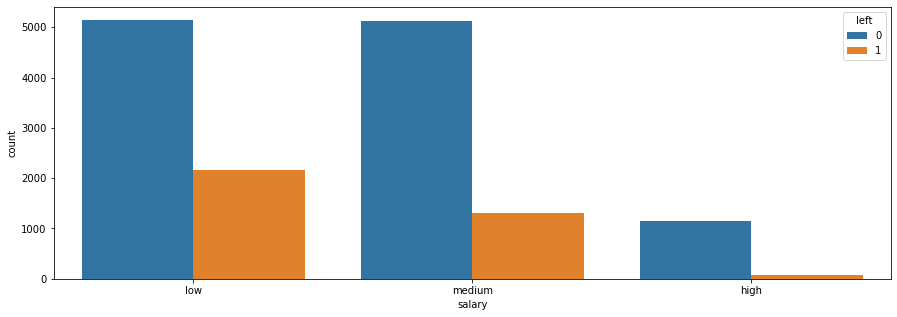

In [165]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(data=df , x='salary',hue='left')
plt.show()

TASK 1 b)

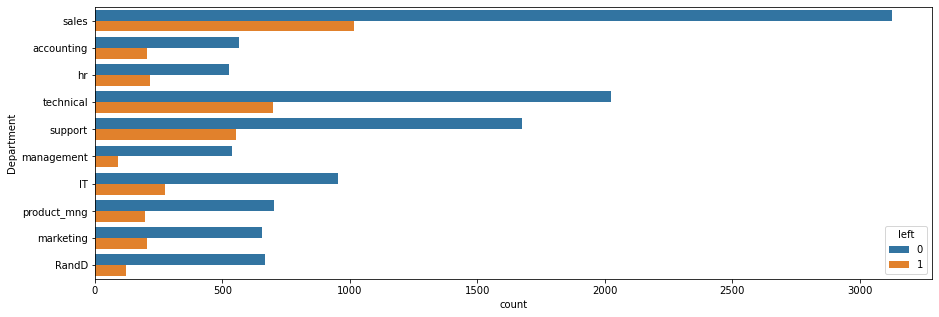

In [166]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(data=df, y='Department',hue='left')
plt.show()

TASK 2

In [167]:
df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [168]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [169]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


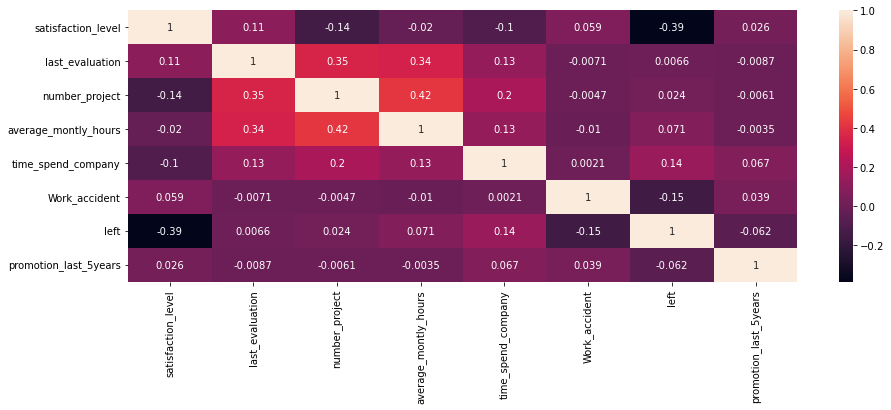

In [170]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [201]:
correlation=df.corr().loc[:,'left']
correlation1=np.sqrt(correlation**2)

In [206]:
ind=[]
for c in correlation1.index:
    if c !='left':
        if (correlation1[c] > np.quantile(correlation1,[0.6])):
            ind.append(c)
    else:
        continue

In [207]:
correlation[ind]

satisfaction_level   -0.388375
time_spend_company    0.144822
Work_accident        -0.154622
Name: left, dtype: float64

In [175]:
from sklearn import preprocessing 
encoder= preprocessing.LabelEncoder()
encoder.fit(df.salary)
df.salary=encoder.transform(df.salary)

In [176]:
encoder.fit(df.Department)
df.Department=encoder.transform(df.Department)

In [177]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


TASK 3 a)

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7)
print(df_train.shape,df_test.shape)

(10499, 10) (4500, 10)


In [179]:
X_train = df_train.drop(columns='left', axis =1)
Y_train = df_train['left']
X_test = df_test.drop(columns='left', axis =1)
Y_test = df_test['left']
X_train.shape, Y_train.shape, X_test.shape

((10499, 9), (10499,), (4500, 9))

TASK 3 b)

In [180]:
import warnings
warnings.simplefilter(action='ignore')

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
Y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

TASK 3 c)

In [181]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

76.33

In [182]:
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

77.29

TASK 4 a)

In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[3207,  243],
       [ 779,  271]], dtype=int64)

In [184]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred, average='weighted'))
print('f1-score:', f1_score(Y_test, Y_pred, average='weighted'))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.7728888888888888
recall: 0.7728888888888888
f1-score: 0.7421574359799817
precision: 0.5272373540856031


TASK 4 b)

In [185]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc

0.8118597653554175

In [186]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.594
